# Predicting whether a new customer will churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Import precision_score
from sklearn.metrics import precision_score

# Import recall_score
from sklearn.metrics import recall_score

# Import roc_curve
from sklearn.metrics import roc_curve

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Import f1_score
from sklearn.metrics import f1_score

In [2]:
telco = pd.read_csv('telco.csv')

In [3]:
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'Avg_Night_Calls'],
      dtype='object')

In [4]:
len(telco.columns)

19

In [5]:
features = telco.drop(['Churn','Avg_Night_Calls'], axis=1).columns

In [6]:
# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

/home/renan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
new_customer = pd.DataFrame(data=[[ 91.  ,  23.  , 232.4 , 186.  , 190.5 ,  12.3 ,   3.  ,   0.  ,
          1.  ,  97.  ,  39.51,  88.  ,  15.81, 128.  ,   8.57,   3.  ,
          3.32]], columns=telco[features].columns)

In [8]:
# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


# Training another scikit-learn model

In [9]:
# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


# Creating training and test sets

In [10]:
# Create feature variable
X = telco[features]

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=0)

# Computing accuracy

In [11]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.96


# Confusion matrix

In [12]:
y_pred = clf.predict(X_test)

In [13]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[851  11]
 [ 29 109]]


# Varying training set size

In [14]:
precisionscore = []

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[569  10]
 [ 18  70]]


# Computing precision and recall

In [15]:
precisionscore = []
recallscore = []
rocaucscore = []
f1score = []

for i in np.arange(0.1,1,0.1):
    
    # Create training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=0)

    # Fit to the training data
    clf.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    
    # Generate the probabilities
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    
    precisionscore.append(precision_score(y_test, y_pred))
    recallscore.append(recall_score(y_test, y_pred))
    rocaucscore.append(roc_auc_score(y_test, y_pred_prob))
    f1score.append(f1_score(y_test, y_pred))

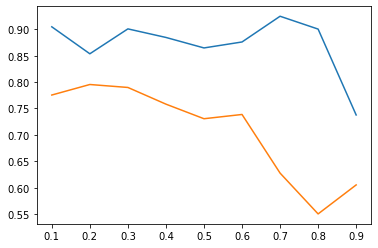

In [16]:
trainsize = [i for i in np.arange(0.1,1,0.1)]
plt.plot(trainsize, precisionscore)
plt.plot(trainsize,recallscore)

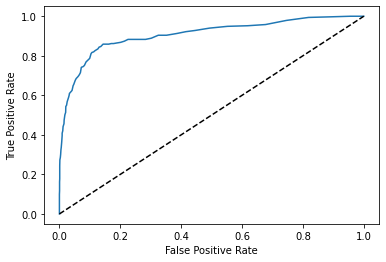

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=0)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

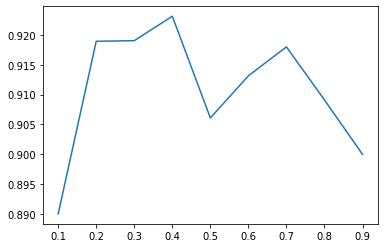

In [18]:
plt.plot(trainsize,rocaucscore)

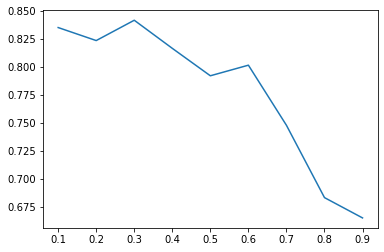

In [19]:
plt.plot(trainsize,f1score)